# Mycophyto formated
## Import data

In [1]:
import pandas as pd
import os  

### vars

In [2]:
pwd=''
metabarcoding_file= pwd+'paste_hmmer_pv2e50_mbntcma'
metadata_file=pwd+'JGI_metadata_200817_lat11_long12.xls'
JGI_file=pwd+'2_jigData_metagID.txt'
euka_file=pwd+'3-euka.fr'
R='taxontable_rhizosphere_01-nov-2020.xls'

### Imports files into dataframe

In [3]:
metadata_pd=pd.read_table(metadata_file, sep='\t', header=0)
metabarcoding_pd=pd.read_table(metabarcoding_file, sep='\t', names=['taxon_oid','seq_id','combinedName','protacc','idPercent','len','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore taxid','complete_lineage','complete_taxid'])
jgi_pd=pd.read_table(JGI_file, sep='\t', names=['taxon_oid','seq_id','combinedName', 'idPercent','len','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore taxid','complete_lineage','complete_taxid'])
euka_pd=pd.read_table(euka_file, sep='\t', names=['taxon_oid','seq_id','cat','taxid','evalue','complete_lineage'])

In [4]:
jgi_pd.head(2)

,taxon_oid,seq_id,combinedName,idPercent,len,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore taxid,complete_lineage,complete_taxid
0,3300009012,Ga0066710_100020806,QZLH01002322.1,78.818,2436,422,63,951,3340,14035,11648,0.000000e+00,1554 118614 118614,;cellular organisms;Eukaryota;Opisthokonta;Fun...,;131567;2759;33154;4751;112252;1913637;214504;...
1,3300009012,Ga0066710_100052819,NW_020269255.1,89.474,171,11,6,4618,4786,27722,27887,1.100000e-48,209 747089 747089,;cellular organisms;Eukaryota;Opisthokonta;Fun...,;131567;2759;33154;4751;112252;1913637;214504;...


In [5]:
euka_pd.head(2)

,taxon_oid,seq_id,cat,taxid,evalue,complete_lineage
0,3300000364,INPhiseqgaiiFebDRAFT,INPhiseqgaiiFebDRAFT_100486807.g14.t1_3300000364,588596,1.300000e-07,;cellular organisms;Eukaryota;Opisthokonta;Fun...
1,3300000364,INPhiseqgaiiFebDRAFT,INPhiseqgaiiFebDRAFT_101996158.g15.t1_3300000364,94130,4.600000e-227,;cellular organisms;Eukaryota;Opisthokonta;Fun...


In [6]:
metabarcoding_pd.describe()

,taxon_oid,idPercent,len,mismatch,gapopen,qstart,qend,sstart,send,evalue
count,1.260000e+02,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,1.260000e+02
mean,3.300014e+09,94.605246,297.285714,13.841270,3.587302,28.007937,322.404762,1256.571429,1549.253968,3.203261e-05
std,1.013690e+04,5.038790,291.748107,23.012488,6.779109,46.858510,299.427378,1234.087539,1212.546840,3.563371e-04
min,3.300001e+09,78.140000,36.000000,0.000000,0.000000,1.000000,36.000000,1.000000,44.000000,0.000000e+00
25%,3.300006e+09,92.136250,95.000000,1.000000,0.000000,1.000000,112.000000,340.500000,756.250000,7.200098e-139
50%,3.300010e+09,95.607500,238.000000,6.000000,1.000000,5.000000,260.000000,941.500000,1467.000000,7.075000e-72
75%,3.300025e+09,98.944250,408.500000,14.000000,4.000000,35.500000,431.500000,1498.000000,1698.500000,3.247500e-30
max,3.300031e+09,100.000000,2012.000000,159.000000,38.000000,193.000000,1991.000000,5724.000000,5791.000000,4.000000e-03


# Analyse separée

In [7]:
len(jgi_pd.taxon_oid.unique())

441

In [8]:
len(euka_pd.taxon_oid.unique())

372

In [9]:
len(metabarcoding_pd.taxon_oid.unique())

78

In [10]:
jgi_pd_geo= pd.merge(jgi_pd, metadata_pd,on='taxon_oid')
metabarcoding_pd_geo= pd.merge(metabarcoding_pd, metadata_pd,on='taxon_oid')
euka_pd_geo= pd.merge(euka_pd, metadata_pd,on='taxon_oid')
print(f'{len(jgi_pd_geo.Latitude)=} {len(metabarcoding_pd_geo.Latitude)=} {len(euka_pd_geo.Latitude)=}')


len(jgi_pd_geo.Latitude)=24964 len(metabarcoding_pd_geo.Latitude)=126 len(euka_pd_geo.Latitude)=20613


In [11]:
ll_jgi=jgi_pd_geo['Latitude'].to_frame().join(jgi_pd_geo['Longitude'])
print(f'{len(ll_jgi)=}')
print(f'{len(ll_jgi.drop_duplicates())=}')

len(ll_jgi)=24964
len(ll_jgi.drop_duplicates())=64


In [12]:
ll_meta=metabarcoding_pd_geo['Latitude'].to_frame().join(metabarcoding_pd_geo['Longitude'])
print(f'{len(ll_meta)=}')
print(f'{len(ll_meta.drop_duplicates())=}')

len(ll_meta)=126
len(ll_meta.drop_duplicates())=23


In [13]:
ll_euka=euka_pd_geo['Latitude'].to_frame().join(euka_pd_geo['Longitude'])
print(f'{len(ll_euka)=}')
print(f'{len(ll_euka.drop_duplicates())=}')

len(ll_euka)=20613
len(ll_euka.drop_duplicates())=75


In [14]:
jgi_meta=pd.merge(ll_jgi,ll_meta,how='outer')
jgi_euka=pd.merge(ll_jgi,ll_euka,how='outer')
euka_meta=pd.merge(ll_euka,ll_meta,how='outer')

In [15]:
euka_meta_jgi=pd.merge(euka_meta.drop_duplicates(),jgi_euka.drop_duplicates(),how='outer')

In [16]:
print(f'{len(jgi_meta.drop_duplicates())=} {len(jgi_euka.drop_duplicates())=} {len(euka_meta.drop_duplicates())=}  {len(euka_meta_jgi.drop_duplicates())=}  ')

len(jgi_meta.drop_duplicates())=76 len(jgi_euka.drop_duplicates())=120 len(euka_meta.drop_duplicates())=82  len(euka_meta_jgi.drop_duplicates())=125  


In [17]:
ll_metadata_pd=metadata_pd['Latitude'].to_frame().join(metadata_pd['Longitude'])
print(f'{len(ll_metadata_pd)=}')
print(f'{len(ll_metadata_pd.drop_duplicates())=}')

len(ll_metadata_pd)=5926
len(ll_metadata_pd.drop_duplicates())=647


In [18]:
ll_metadata_pd.Latitude=ll_metadata_pd['Latitude'].apply(str)
ll_metadata_pd.Longitude=ll_metadata_pd['Longitude'].apply(str)
ll_metadata_pd['Lat_Long']=ll_metadata_pd['Latitude']+ll_metadata_pd['Longitude']
ll_metadata_pd

,Latitude,Longitude,Lat_Long
0,42.48,-72.1787,42.48-72.1787
1,42.471115999999995,-72.17263,42.471115999999995-72.17263
2,42.4531,-76.3842,42.4531-76.3842
3,68.6135,-149.3144,68.6135-149.3144
4,68.6135,-149.3144,68.6135-149.3144
...,...,...,...
5921,49.2598372,-123.24593629999998,49.2598372-123.24593629999998
5922,42.481016,-72.178343,42.481016-72.178343
5923,31.837801000000002,-110.350292,31.837801000000002-110.350292
5924,18.0,-65.0,18.0-65.0


## cat all data

In [19]:
jgi_pd_geo['methode'] = 'jgi'
euka_pd_geo['methode'] = 'Euka_Imp'
metabarcoding_pd_geo['methode'] = 'Metabarcoding'

In [20]:
#metadata_file_hmm=metadata_pd[ metadata_pd.taxon_oid.isin(metabarcoding_pd.taxon_oid) ]

In [21]:
geo=pd.merge(jgi_pd_geo,metabarcoding_pd_geo,how='outer')

In [22]:
geo_all=pd.merge(geo,euka_pd_geo,how='outer')

In [23]:
#metadata_pd_all=metadata_pd[ metadata_pd.taxon_oid.isin(metabarcoding_pd.taxon_oid) ]
#ll_metadata_file_hmm=metadata_file_hmm['Latitude'].to_frame().join(metadata_file_hmm['Longitude'])

# INTERSEC 

.......
contig / methode 
metag / methode



## plot map

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

### par methode

In [25]:
lat=geo_all.Latitude
long=geo_all.Longitude
col=geo_all.methode
colU=geo_all.methode.unique()
geo_all.complete_lineage=geo_all.complete_lineage.str.replace(';cellular organisms;Eukaryota;Opisthokonta;Fungi;Fungi incertae sedis;Mucoromycota;Glomeromycotina;Glomeromycetes;','')
colU

array(['jgi', 'Metabarcoding', 'Euka_Imp'], dtype=object)

In [26]:
color = list(np.random.choice(range(256), size=3)) 
color=['darkblue','lime','darkred']
col_dico={colU[i]:color[i] for i in range(0,len(colU))}    
col_dico

{'jgi': 'darkblue', 'Metabarcoding': 'lime', 'Euka_Imp': 'darkred'}

In [27]:
colors=[col_dico[c] for c in col]

In [28]:
len(geo_all.seq_id.unique())

25457

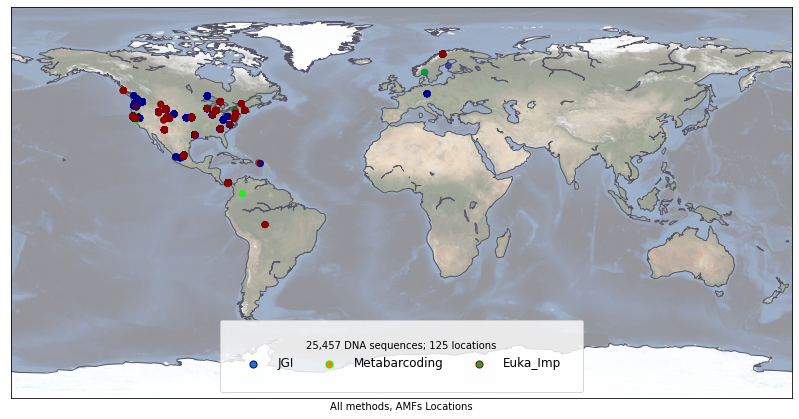

In [43]:
plt.figure(figsize=(14, 8))
earth = Basemap()
earth.bluemarble(alpha=0.42)
earth.drawcoastlines(color='#555566', linewidth=1)

plt.scatter(long, lat, 
            c=colors,alpha=0.5, zorder=10)

l1 = plt.scatter([],[], s=50, edgecolors='darkblue')
l2 = plt.scatter([],[], s=50, edgecolors='lime')
l3 = plt.scatter([],[], s=50, edgecolors='darkred')

labels = ["JGI", "Metabarcoding", "Euka_Imp"]

leg = plt.legend([l1, l2, l3], labels, ncol=3, frameon=True, fontsize=12,
handlelength=2, loc = 8, borderpad = 1.8,
handletextpad=1, title='25,457 DNA sequences; 125 locations', scatterpoints = 1)


plt.xlabel("All methods, AMFs Locations")
plt.savefig('allMpap_methodo.png', dpi=350)

# focus USA

In [59]:
geo_all_us=geo_all[geo_all.Latitude>30]
geo_all_us=geo_all_us[geo_all_us.Longitude<-30]

42206

In [151]:
lats=geo_all_us.Latitude.to_list()
lons=geo_all_us.Longitude.to_list()

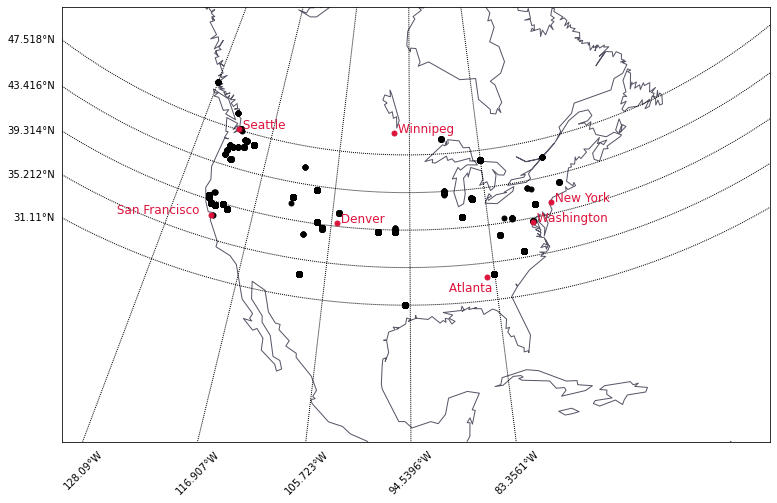

In [193]:
plt.figure(figsize=(14, 8))
earth = Basemap(llcrnrlon=-130,llcrnrlat=10,urcrnrlon=-30,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)
#earth.bluemarble(alpha=0.42)
earth.drawcoastlines(color='#555566', linewidth=1)

##test
bbox = [np.min(lats),np.max(lats),\
        np.min(lons),np.max(lons)]
# Draw coastlines and fill continents and water with color
m.drawcoastlines()
m.fillcontinents(color='peru',lake_color='dodgerblue')

# draw parallels, meridians, and color boundaries
earth.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/5),labels=[1,0,0,0])
earth.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/5),labels=[0,0,0,1],rotation=45)

##

# build and plot coordinates onto map
x,y = earth(lons,lats)
earth.plot(x,y,'ok',markersize=5)

# Map (long, lat) to (x, y) for plotting
x, y = earth(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5,c='crimson')
plt.text(x, y, ' Seattle', fontsize=12,c='crimson');


x, y = earth(-74.0423, 40.627508)
plt.plot(x, y, 'ok', markersize=5,c='crimson')
plt.text(x, y, ' New York', fontsize=12,c='crimson');

x, y = earth(-77.046779, 38.89399)
plt.plot(x, y, 'ok', markersize=5,c='crimson')
plt.text(x, y, ' Washington', fontsize=12,c='crimson');


x, y = earth(-84.382364, 33.679604)
plt.plot(x, y, 'ok', markersize=5,c='crimson')
x, y = earth(-90, 32.5)
plt.text(x-100, y, ' Atlanta', fontsize=12,c='crimson');

x, y = earth(-122.460304, 37.742919)
plt.plot(x, y, 'ok', markersize=5,c='crimson')
x, y = earth(-135, 34)
plt.text(x, y, ' San Francisco', fontsize=12,c='crimson');

x, y = earth(-97.088361, 49.88731)
plt.plot(x, y, 'ok', markersize=5,c='crimson')
plt.text(x, y, ' Winnipeg', fontsize=12,c='crimson');

x, y = earth(-104.971795, 39.682384)
plt.plot(x, y, 'ok', markersize=5,c='crimson')
plt.text(x, y, ' Denver', fontsize=12,c='crimson');

plt.savefig('focus_USA.png', dpi=350)

### par species

In [199]:
ls ..

 Desktop/                                          Mycophyto_slide1.zip
 Documents/                                        Script_git/
 Downloads/                                        snap/
'Feuille de calcul sans titre - Feuille 1-1.png'   tarballs/
 Insync/                                           tmp/
 miniconda3/                                       tools/
 Mycophyto_slide1/


In [31]:
lat=geo_all.Latitude
long=geo_all.Longitude
col=geo_all.complete_lineage
colU=geo_all.complete_lineage.unique()
geo_all.complete_lineage=geo_all.complete_lineage.str.replace(';cellular organisms;Eukaryota;Opisthokonta;Fungi;Fungi incertae sedis;Mucoromycota;Glomeromycotina;Glomeromycetes;','')
geo_all=geo_all[~(geo_all.complete_lineage == '')]

 

In [ ]:
color = list(np.random.choice(range(256), size=45)) 
col_dico={colU[i]:color[i] for i in range(0,len(colU))}   

colors=[col_dico[c] for c in col]

In [ ]:
plt.figure(figsize=(14, 8))
earth = Basemap()
earth.bluemarble(alpha=0.42)
earth.drawcoastlines(color='#555566', linewidth=1)



plt.scatter(long, lat, 
            c=colors,alpha=0.1, zorder=10)


In [ ]:
plt.xlabel("Species, AMFs Locations")
plt.savefig('allMpap_spe.png', dpi=350)

# new metag

In [196]:
new_pd=pd.read_table('S2', sep='\t', header=0, names=['Latitude','Longitude'])
new_pd

,Latitude,Longitude
0,10.239333,-61.604991
1,11.5044,105.0336
2,-12.2,-38.11
3,16.249,-61.565
4,17.550556,-97.425556
...,...,...
397,8.5,76.7
398,-8.6625,-42.6784
399,-9.015859,-42.699586
400,9.941418,78.008896


# VENN

# old

In [ ]:

metabarcoding_pd_geo= pd.merge(metabarcoding_pd, metadata_pd,on='taxon_oid')

metabarcoding_pd_geo.complet_lineage=metabarcoding_pd_geo.complet_lineage.str.replace(';cellular organisms;Eukaryota;Opisthokonta;Fungi;Fungi incertae sedis;Mucoromycota;Glomeromycotina;Glomeromycetes;','')
metabarcoding_pd_geo[['Latitude','Longitude','Species','complet_lineage','idPercent','len']]
metabarcoding_pd_geo.len.describe()

In [ ]:
lat=metabarcoding_pd_geo.Latitude
long=metabarcoding_pd_geo.Longitude
col=metabarcoding_pd_geo.complet_lineage.unique()

In [ ]:
color = list(np.random.choice(range(256), size=23))
col_dico={}
for i in range(0,len(col)) : 
    col_dico[col[i]]=color[i]

handle_dict=[col_dico[l] for l in  metabarcoding_pd_geo.complet_lineage]

In [ ]:
plt.figure(figsize=(14, 8))
earth = Basemap()

earth.bluemarble(alpha=0.42)
earth.drawcoastlines(color='#555566', linewidth=1)

plt.scatter(long, lat, 
            c=handle_dict,alpha=0.5, zorder=10)

plt.xlabel("Metabarcoding results 126AMFs 23spots")
plt.savefig('_metabarcoding_126cma_78spot.png', dpi=350)

In [ ]:
pwd

In [ ]:
metabarcoding_pd_geo= pd.merge(metabarcoding_pd, metadata_pd,on='taxon_oid')
metabarcoding_pd_geo.complet_lineage=metabarcoding_pd_geo.complet_lineage.str.replace(';cellular organisms;Eukaryota;Opisthokonta;Fungi;Fungi incertae sedis;Mucoromycota;','')

In [ ]:
metabarcoding_pd_geo[['Latitude','Longitude','Species','complet_lineage','idPercent','len','taxon_oid']]
by_loc=metabarcoding_pd_geo.groupby("Latitude")["complet_lineage"]

In [ ]:
species_list=[]
for state, frame in by_loc:
    l=frame
    ll=[i.split(';')[-2] for i in l ]
    species_list.append(set(ll))


In [ ]:
import statistics 
statistics.mean([len(i) for i in species_list])

In [ ]:
species_list
## test compo

In [ ]:
by_loc=metabarcoding_pd_geo.groupby("Latitude")
by_loc.groups.keys()
g=metabarcoding_pd_geo.groupby('Latitude')['complet_lineage'].count()

In [ ]:
metabarcoding_pd_geo.to_csv(r'mycophyto_res/hmm_coord.csv', index = False)

## compo

In [ ]:
l=[(i.split(';')[-3])for i in metabarcoding_pd_geo.complet_lineage]

d={x:l.count(x) for x in sorted(set(l))}


In [ ]:
t=metabarcoding_pd_geo.groupby('complet_lineage')['complet_lineage'].count()

In [ ]:
plt.pie(d.values(), labels=d.keys(),  textprops={'fontsize': 3},
autopct='%1.1f%%', shadow=False, startangle=140)

plt.axis('equal')
plt.savefig('pie_hmm_genus.png', dpi=350)

In [ ]:
l=[(i.split(';')[-4])for i in metabarcoding_pd_geo.complet_lineage]

d={x:l.count(x) for x in sorted(set(l))}
d.keys()
t=metabarcoding_pd_geo.groupby('complet_lineage')['complet_lineage'].count()
plt.pie(d.values(), labels=d.keys(),  textprops={'fontsize': 3},
autopct='%1.1f%%', shadow=False, startangle=140)

plt.axis('equal')
plt.savefig('pie_hmm_family.png', dpi=350)

# JGI data

In [ ]:
JGI_file= '/lerins/hub/projects/25_20191015_Mycophyto_AMF/raw/2_jigData_metagID.txt'

In [ ]:
## a modifier
# AJOUTER METAG ID
metadata_pd=pd.read_table(metadata_file, sep='\t', header=0)
JGI_pd=pd.read_table(JGI_file, sep='\t', names=['taxon_oid','seq_id','combinedName', 'idPercent','len','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore taxid','complet_lineage','complete_taxid'])
JGI_pd.describe()

### stat dmd

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")
# Load the example tips dataset
tips = sns.load_dataset("tips")

In [ ]:
# Draw a nested boxplot to show bills by day and time
sns.boxplot(JGI_pd.idPercent)

#sns.despine(offset=10, trim=True)

## 

In [ ]:
metadata_file_jgi=metadata_pd[ metadata_pd.taxon_oid.isin(JGI_pd.taxon_oid) ]
len(metadata_file_jgi.Longitude.unique())
t=metadata_file_jgi['Latitude'].astype(str) + metadata_file_jgi['Longitude'].astype(str)


In [ ]:
JGI_pd_geo= pd.merge(JGI_pd, metadata_file_jgi,on='taxon_oid')
JGI_pd_geo.complet_lineage=JGI_pd_geo.complet_lineage.str.replace(';cellular organisms;Eukaryota;Opisthokonta;Fungi;Fungi incertae sedis;Mucoromycota;Glomeromycotina;Glomeromycetes;','')
gg=JGI_pd_geo[['Latitude','Longitude','Species','complet_lineage','idPercent','len']]

In [ ]:
lat=metadata_file_jgi.Latitude
long=metadata_file_jgi.Longitude
col=JGI_pd.complet_lineage

In [ ]:
lat=JGI_pd_geo.Latitude
long=JGI_pd_geo.Longitude
col=JGI_pd_geo.complet_lineage.unique()

In [ ]:
import numpy as np
color = list(np.random.choice(range(256), size=23))
col_dico={}
for i in range(0,len(col)) : 
    col_dico[col[i]]=color[i]

handle_dict=[col_dico[l] for l in  JGI_pd_geo.complet_lineage]

In [ ]:
plt.figure(figsize=(14, 8))
earth = Basemap()

earth.bluemarble(alpha=0.42)
earth.drawcoastlines(color='#555566', linewidth=1)

plt.scatter(long, lat, 
            c=handle_dict,alpha=0.5, zorder=10)
plt.xlabel("jgi results 23spots")
plt.savefig('_jgi.png', dpi=350)

In [ ]:
JGI_pd= pd.merge(JGI_pd, metadata_pd,on='taxon_oid')
JGI_pd.complet_lineage=JGI_pd_geo.complet_lineage.str.replace(';cellular organisms;Eukaryota;Opisthokonta;Fungi;Fungi incertae sedis;Mucoromycota;','')

In [ ]:
JGI_pd_geo[['Latitude','Longitude','Species','complet_lineage','idPercent','len','taxon_oid']]
by_loc=JGI_pd_geo.groupby("Latitude")["complet_lineage"]
by_loc

In [ ]:
import statistics
species_list=[]
for state, frame in by_loc:
    l=frame
    ll=[i.split(';')[-2] for i in l ]
    species_list.append(set(ll))


statistics.mean([len(i) for i in species_list])

In [ ]:
by_loc=JGI_pd_geo.groupby("Latitude")
by_loc.groups.keys()
g2=JGI_pd_geo.groupby('Latitude')['complet_lineage'].count()

In [ ]:
JGI_pd_geo.to_csv(r'mycophyto_res/jgi_coord.csv', index = False)

In [ ]:
l=[(i.split(';')[-3])for i in JGI_pd_geo.complet_lineage]

d={x:l.count(x) for x in sorted(set(l))}
d.keys()

t=JGI_pd_geo.groupby('complet_lineage')['complet_lineage'].count()

In [ ]:
plt.pie(d.values(), labels=d.keys(),  textprops={'fontsize': 3},
autopct='%1.1f%%', shadow=False, startangle=140)

plt.axis('equal')
plt.savefig('pie_jgi_genus.png', dpi=350)

In [ ]:
l=[(i.split(';')[-4])for i in JGI_pd_geo.complet_lineage]

d={x:l.count(x) for x in sorted(set(l))}
d.keys()
t=JGI_pd_geo.groupby('complet_lineage')['complet_lineage'].count()
plt.pie(d.values(), labels=d.keys(),  textprops={'fontsize': 3},
autopct='%1.1f%%', shadow=False, startangle=140)

plt.axis('equal')
plt.savefig('pie_jgi_family.png', dpi=350)

In [ ]:
len(metabarcoding_pd.taxon_oid.unique())

# Euka

In [ ]:
#euka_file= '/lerins/hub/projects/25_20191015_Mycophyto_AMF/raw/Table_ori/euka_outdmd-Glomerom_50euk.txt'
euka_file= '/lerins/hub/projects/25_20191015_Mycophyto_AMF/raw/3-euka.fr'

In [ ]:
import pandas as pd
import os  
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns

In [ ]:
metadata_pd=pd.read_table(metadata_file, sep='\t', header=0)

In [ ]:
euka_pd=pd.read_table(euka_file, sep='\t', names=['taxon_oid','seq_id','cat','taxid','evalue','complete_lineage'])

In [ ]:
len(euka_pd.taxon_oid.unique())

In [ ]:
metadata_file_euka=metadata_pd[ metadata_pd.taxon_oid.isin(euka_pd.taxon_oid) ]

In [ ]:
euka_pd_geo= pd.merge(euka_pd, metadata_pd,on='taxon_oid')
euka_pd_geo.complete_lineage=euka_pd_geo.complete_lineage.str.replace(';cellular organisms;Eukaryota;Opisthokonta;Fungi;Fungi incertae sedis;Mucoromycota;','')

In [ ]:
lat=metadata_file_euka.Latitude
long=metadata_file_euka.Longitude
col=euka_pd.complete_lineage
col[1]

In [ ]:
euka_pd_geo= pd.merge(euka_pd, metadata_pd,on='taxon_oid')
euka_pd_geo.complete_lineage=euka_pd_geo.complete_lineage.str.replace(';cellular organisms;Eukaryota;Opisthokonta;Fungi;Fungi incertae sedis;Mucoromycota;Glomeromycotina;Glomeromycetes;','')
euka_pd_geo[['Latitude','Longitude','Species','complete_lineage']]
euka_pd_geo.describe()

In [ ]:
lat=euka_pd_geo.Latitude
long=euka_pd_geo.Longitude
col=euka_pd_geo.complete_lineage.unique()
len(col)

In [ ]:
color = list(np.random.choice(range(256), size=25))
col_dico={}
for i in range(0,len(col)) : 
    col_dico[col[i]]=color[i]

handle_dict=[col_dico[l] for l in  euka_pd_geo.complete_lineage]

In [ ]:
plt.figure(figsize=(14, 8))
earth = Basemap()

earth.bluemarble(alpha=0.42)
earth.drawcoastlines(color='#555566', linewidth=1)

plt.scatter(long, lat, 
            c=handle_dict,alpha=0.5, zorder=10)

plt.xlabel("euka results 126AMFs 23spots")
plt.savefig('_euka_126cma_78spot.png', dpi=350)

In [ ]:
euka_pd_geo[['Latitude','Longitude','Species','complete_lineage','taxon_oid']]
by_loc=euka_pd_geo.groupby("Latitude")["complete_lineage"]
by_loc


In [ ]:
species_list=[]
for state, frame in by_loc:
    l=frame
    ll=[i.split(';')[-2] for i in l if len(i.split(';')) >2 ]
    species_list.append(set(ll))

In [ ]:
statistics.mean([len(i) for i in species_list])

In [ ]:
species_list

In [ ]:
by_loc=euka_pd_geo.groupby("Latitude")
by_loc.groups.keys()
euka_pd_geo.groupby('Latitude')['complete_lineage'].count()

In [ ]:
euka_pd_geo.to_csv(r'euka_coord.csv', index = False)

In [ ]:
l=[(i.split(';')[-3])for i in euka_pd_geo.complete_lineage if len(i.split(';'))>3]

In [ ]:
d={x:l.count(x) for x in sorted(set(l))}
d.keys()

In [ ]:
t=euka_pd_geo.groupby('complete_lineage')['complete_lineage'].count()

In [ ]:
plt.pie(d.values(), labels=d.keys(),  textprops={'fontsize': 2},
autopct='%1.1f%%', shadow=False, startangle=140)

plt.axis('equal')
plt.savefig('pie_euka_genus.png', dpi=350)

In [ ]:
l=[(i.split(';')[-4])for i in euka_pd_geo.complete_lineage if len(i.split(';'))>3]

d={x:l.count(x) for x in sorted(set(l))}
d.keys()
t=euka_pd_geo.groupby('complete_lineage')['complete_lineage'].count()
plt.pie(d.values(), labels=d.keys(),  textprops={'fontsize': 3},
autopct='%1.1f%%', shadow=False, startangle=140)

plt.axis('equal')
plt.savefig('pie_euka_family.png', dpi=350)

In [ ]:
len(euka_pd_geo.Latitude.unique())

In [ ]:
# Comp
JGI_pd_geo metabarcoding_pd_geo

In [ ]:
len(set(euka_pd_geo.Latitude))
len(set(euka_pd_geo.Latitude))
len(set(euka_pd_geo.Latitude))

In [ ]:
euka_pd_geo.Latitude+JGI_pd_geo.Latitude